In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
data_train = pd.read_csv("train.csv")
data_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data_train.replace(["female", "male"], [0, 1], inplace=True)
data_train.fillna(0, inplace=True)
data_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,S


In [8]:
X_train = np.array(data_train[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]])
Y_train = np.array(data_train[["Survived"]])

Model

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6, activation="sigmoid"),     # input layer
    tf.keras.layers.Dense(20, activation="relu"),       # hidden layer 1
    tf.keras.layers.Dense(8, activation="sigmoid"),     # hidden layer 2
    tf.keras.layers.Dense(2, activation="softmax")      # output layer
])

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])


In [11]:
output = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
28/28 [==============================] - 2s 7ms/step - loss: 0.6501 - accuracy: 0.6263
Epoch 2/100
28/28 [==============================] - 0s 6ms/step - loss: 0.6158 - accuracy: 0.6745
Epoch 3/100
28/28 [==============================] - 0s 6ms/step - loss: 0.6031 - accuracy: 0.6712
Epoch 4/100
28/28 [==============================] - 0s 8ms/step - loss: 0.5925 - accuracy: 0.6779
Epoch 5/100
28/28 [==============================] - 0s 5ms/step - loss: 0.5898 - accuracy: 0.6824
Epoch 6/100
28/28 [==============================] - 0s 6ms/step - loss: 0.5816 - accuracy: 0.6723
Epoch 7/100
28/28 [==============================] - 0s 6ms/step - loss: 0.5710 - accuracy: 0.6902
Epoch 8/100
28/28 [==============================] - 0s 4ms/step - loss: 0.5517 - accuracy: 0.7037
Epoch 9/100
28/28 [==============================] - 0s 4ms/step - loss: 0.5392 - accuracy: 0.7149
Epoch 10/100
28/28 [==============================] - 0s 5ms/step - loss: 0.5213 - accuracy: 0.7520
Epoch 11/

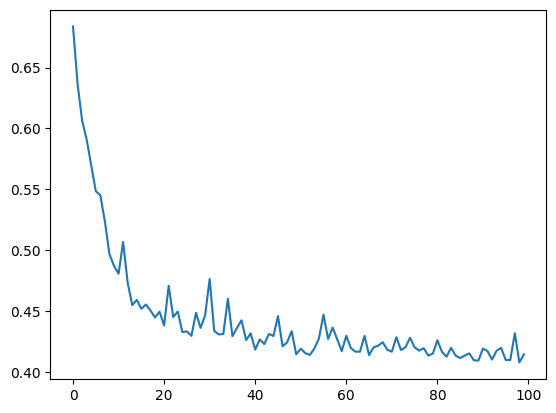

In [ ]:
plt.plot(output.history["loss"])
plt.show()

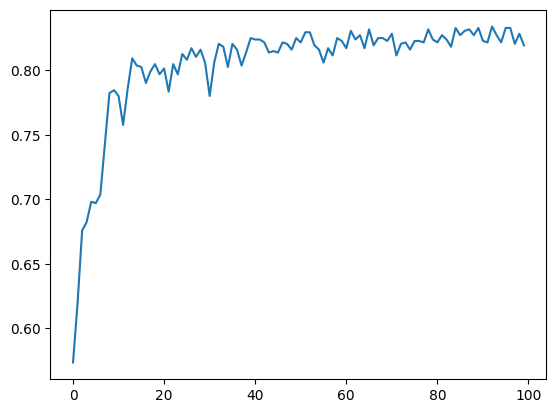

In [ ]:
plt.plot(output.history["accuracy"])
plt.show()

Evaluating the model on test dataset

In [19]:
data_test = pd.read_csv("test.csv")
data_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [20]:
data_test.replace(["female", "male"], [0, 1], inplace=True)
data_test.fillna(0, inplace=True)
# data_test.head(10)

In [21]:
X_test = np.array(data_test[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]])

target = pd.read_csv("gender_submission.csv")
Y_test = np.array(target[["Survived"]])

In [22]:
model.evaluate(X_test,  Y_test)

14/14 [==============================] - 0s 5ms/step - loss: 0.2918 - accuracy: 0.9211


[0.29183170199394226, 0.9210526347160339]